In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [155]:
def perform_backward_elimination(dataset, dependents):
    new_ds = np.append(np.ones((dataset.shape[0], 1), dtype=np.int8), dataset, 1)
    selected_variables = np.array(list(range(0, new_ds.shape[1])))
    # Significance level chosen
    SL = 0.05
    # Automatic backward elimination
    final = False
    while not final:
        X_opt = new_ds[:, selected_variables]
        regressor_OLS = sm.OLS(endog=dependents, exog=X_opt).fit()
        if (max(regressor_OLS.pvalues) > SL):
            selected_variables = selected_variables[regressor_OLS.pvalues != max(regressor_OLS.pvalues)]
        else:
            final = True
    return selected_variables

In [157]:
df = pd.read_csv("50_Startups.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [158]:
# encode state column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = LabelEncoder()
X[:, 3] = labelEncoder.fit_transform(X[:, 3])
oneHotEncoder = OneHotEncoder(categorical_features = [3])
X = oneHotEncoder.fit_transform(X).toarray()

In [159]:
# Avoiding the dummy variable trap
# because sklearn's linear regression will handle this for us
# so this step is optional, just for demonstration purpose
X = X[:, 1:]
X_opt = X[:, [2]]

In [156]:
perform_backward_elimination(X, y)

[0 1 2 3 4 5]


array([0, 3])

In [160]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_opt, y, test_size=0.2, random_state=0)

In [161]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

regressor_opt = LinearRegression() 
regressor_opt.fit(X_opt_train, y_opt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
y_predict = regressor.predict(X_test)
y_opt_predict = regressor_opt.predict(X_opt_test)

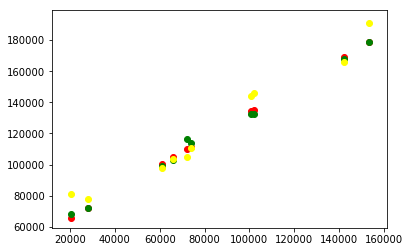

In [166]:
plt.scatter(X_opt_test, y_opt_predict, c='red')
plt.scatter(X_test[:, [2]], y_predict, c='green')
plt.scatter(X_test[:, [2]], y_test, c='yellow')
plt.show()

In [110]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1), np.int8), values = X, axis = 1)

In [111]:
# Ordinary least squres 
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 14 Oct 2017   Prob (F-statistic):           3.50e-32
Time:                        23:45:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""